Import numpy and matplotlib

In [324]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

Use numpy to load the data file, then store the data in a variable

In [325]:
data = numpy.loadtxt("Skyserver_Spectro2_13_2018 10_41_13 PM.csv", skiprows = 2, delimiter = ",")

Store names of colums in list names

In [326]:
names = numpy.loadtxt("Skyserver_Spectro2_13_2018 10_41_13 PM.csv", dtype=str, skiprows = 1, delimiter = ",")[0]

Create a dataframe from the csv file.

In [369]:
df = pd.read_csv("/Users/marin/machine/redshift_data_project/Skyserver_Spectro2_13_2018 10_41_13 PM.csv", \
                 delimiter = ",", skiprows=1, dtype=str)
df.head()

,objid,ra,dec,u,g,r,i,z,redshift,specobjid,plate,mjd,fiberid
0,1237645879551000764,348.841086940713,1.26880178583458,25.92735,20.9957,19.24612,18.56461,18.43049,0.3996509,4825695603672457216,4286,55499,322
1,1237645879551066262,348.902530171573,1.27188624932946,19.38905,18.24496,17.58728,17.20807,16.90905,0.03212454,430194949951088640,382,51816,368
2,1237645879562928144,16.0049119708675,1.25942250972049,21.50923,19.6934,18.47973,17.91998,17.55132,0.3120482,754455784200366080,670,52520,374
3,1237645879562928258,16.0202444868512,1.26766725996923,20.96947,20.29136,19.36779,18.86387,18.45551,0.2004682,754453860055017472,670,52520,367
4,1237645879562928805,16.026028703005,1.26677200796832,25.27165,22.32081,21.33033,19.94852,19.47201,0.7526451,4853831831466778624,4311,55506,281


Series([], Name: objid, dtype: object)
Series([], Name: objid, dtype: object)


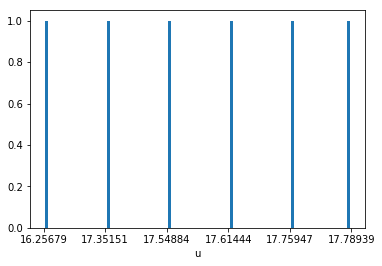

Series([], Name: objid, dtype: object)
Series([], Name: objid, dtype: object)


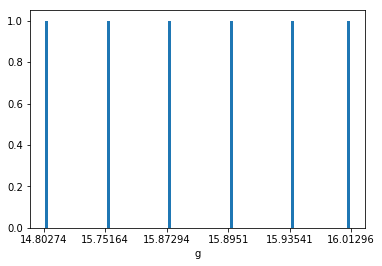

Series([], Name: objid, dtype: object)
Series([], Name: objid, dtype: object)


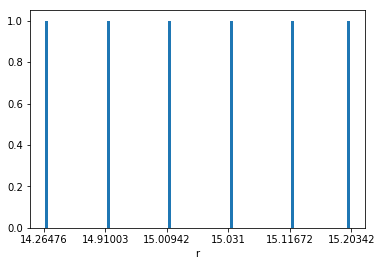

Series([], Name: objid, dtype: object)
Series([], Name: objid, dtype: object)


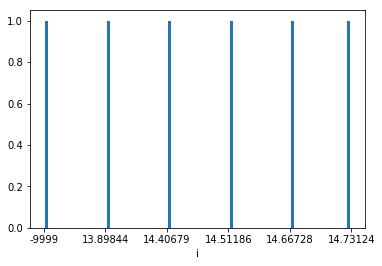

Series([], Name: objid, dtype: object)
Series([], Name: objid, dtype: object)


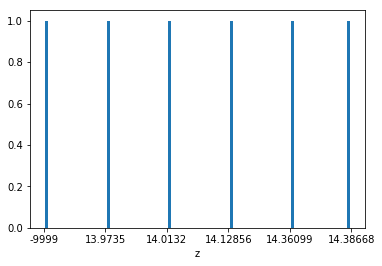

Series([], Name: objid, dtype: object)
Series([], Name: objid, dtype: object)


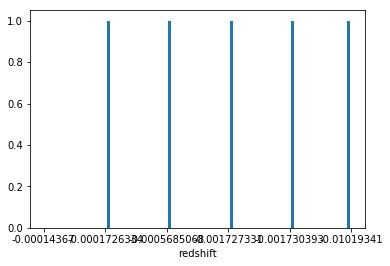

In [420]:
for name in ['u', 'g', 'r', 'i', 'z', 'redshift']:
    print(df['objid'][df[name] == 0.])
    print(df['objid'][df[name] == -9999])
    plt.hist(df[name], bins=50, rwidth = 0.5, range = (0.00,5.0))
    plt.xlabel(name)
    plt.show()

In [422]:
#df_filtered = df[(df['redshift'] == 0.00) | (df['u'] == 9999)]
df_filtered = df[(df['i'] == -9999.0) | (df['z'] == -9999.0)]
df_filtered.head()

,objid,ra,dec,u,g,r,i,z,redshift,specobjid,plate,mjd,fiberid


In [401]:
print(names)

['objid' 'ra' 'dec' 'u' 'g' 'r' 'i' 'z' 'redshift' 'specobjid' 'plate'
 'mjd' 'fiberid']


Create a variable y, where y is the redshift. y is a vector.

In [194]:
y = data.T[8]

Create a variable x, where x is the values that are obtained when astrophysicists try to determine the redshift with the "colored glasses". x is a 4 by 1000 matrix.

In [195]:
x = data.T[3:8]

In [196]:
print(x.T[:10])

[[ 25.92735  20.9957   19.24612  18.56461  18.43049]
 [ 19.38905  18.24496  17.58728  17.20807  16.90905]
 [ 21.50923  19.6934   18.47973  17.91998  17.55132]
 [ 20.96947  20.29136  19.36779  18.86387  18.45551]
 [ 25.27165  22.32081  21.33033  19.94852  19.47201]
 [ 22.64928  22.0096   20.40414  19.57801  19.20975]
 [ 21.41706  18.80885  17.70065  17.20334  16.81356]
 [ 22.98776  21.34827  19.75467  19.14825  18.81528]
 [ 19.78651  18.34659  17.64557  17.25275  17.00746]
 [ 19.52808  17.96541  17.03493  16.53754  16.14154]]


Create a variable, x_rot, which is x transposed. A transposed matrix is one where the first row becomes the first column, second row becomes the second column, etc.

In [197]:
x_rot = x.T

In [198]:
print(type(x))

<class 'numpy.ndarray'>


In [208]:
print(len(x_rot))

1000


In [209]:
print(len(y))

1000


reg.fit takes two parameters: x_rot and y. x_rot is the array training data and y is the array of target values reg.fit creates an equation that fits most of the data points. It does this by solving the equation y=mx+b (unfinished bc not sure why this isn't being used in later code)

reg.fit finds b, m in
$y_{obs, i} = m \cdot a_{i} + b + \sigma_{i} = y_{pred, i} + \sigma_{i}$
by minimizing $\chi^{2}$ when using all $i=1, ...,N$ for N galaxies

In [210]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit (x_rot,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [211]:
reg.coef_

array([-0.02057712,  0.12527263,  0.0009544 , -0.00429071,  0.004331  ])

Do we need this? Isn't y_for_grid just the same thing but it actually works?

y_for_graph is y_pred at the values of x where we know y_obs

In [203]:
y_for_graph = reg.predict(x_rot)

Create a list, x_list, with the minimum and maximum values for each value (u, g, r, i, z) out of the 1000 given (is this right?)

In [204]:
x_list = []
for i in x:
    x_list.append(min(i))
    x_list.append(max(i))
print(x_list)

[16.256789999999999, 27.248329999999999, 14.80274, 25.424969999999998, 14.264760000000001, 29.726279999999999, -9999.0, 24.36224, -9999.0, 22.827069999999999]


one_x_for_plotting is an array consisting of 4 evenly spaced numbers from 15 to the maximum value in x_list.
x_for_plotting is a 2d array with four 4-element arrays inside. (why do we need this?)
y_for_grid uses reg.predict. reg.predict takes the trasnposed matrix of x_for_plotting (unfinished bc not sure if this this is right)

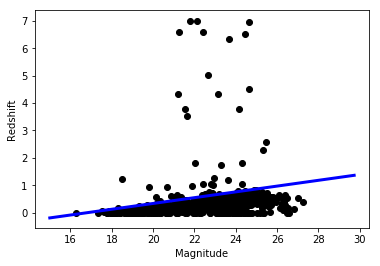

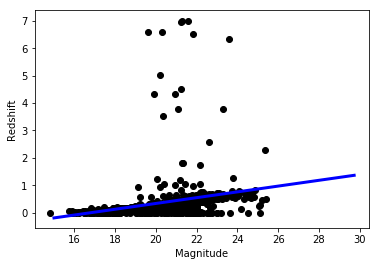

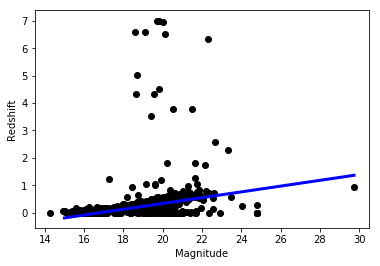

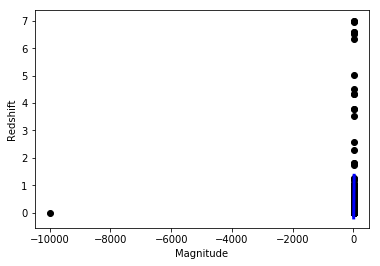

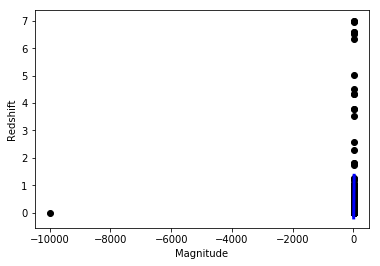

In [220]:
one_x_for_plotting = numpy.linspace(15., max(x_list), 5)
x_for_plotting = numpy.asarray([one_x_for_plotting, one_x_for_plotting, one_x_for_plotting, one_x_for_plotting, one_x_for_plotting])
y_for_grid = reg.predict(x_for_plotting.T)

for i in range(5):
    plt.scatter(x[i], y, color='black')
    plt.plot(x_for_plotting[i], y_for_grid,  color='blue', linewidth = 3)
    plt.xlabel("Magnitude")
    plt.ylabel("Redshift")
    plt.show()

In [157]:
print(type(one_x_for_plotting))

<class 'numpy.ndarray'>


The function chi_square_error calculates the goodness of fit using the chi-squared test, which is the sum of all of the predicted values minus the observed values squared, then divided by the predicted values.

In [158]:
def chi_square_error(observed_y, predicted_y):
    error = 0
    observed_y_list = observed_y.tolist()
    predicted_y_list = predicted_y.tolist()
    for i in predicted_y_list:
        error += ((observed_y_list[predicted_y_list.index(i)] - i)**2)/i
    print(error)

chi_square_error(y, y_for_grid)

-0.2337478314395821


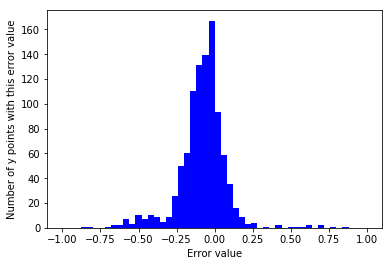

In [278]:
error = numpy.subtract(y, y_for_graph)

plt.hist(error, range = [-1, 1], bins=50, color='blue')
plt.xlabel('Error value')
plt.ylabel('Number of y points with this error value')
plt.show()

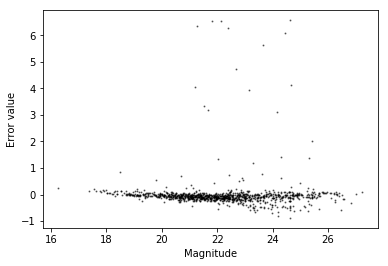

In [276]:
plt.scatter(x[0], error, color='black', s=1, alpha=0.5)
plt.xlabel('Magnitude')
plt.ylabel('Error value')
plt.show()

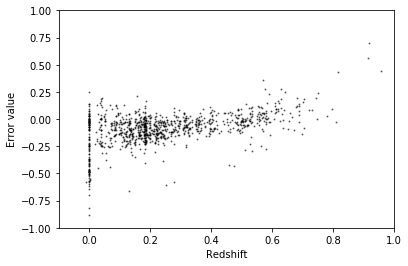

In [277]:
plt.scatter(y, error, color='black', s=1, alpha=0.5)
plt.xlim(-0.1, 1)
plt.ylim(-1,1)
plt.xlabel('Redshift')
plt.ylabel('Error value')
plt.show()

# Questions
Why don't we use the equation we got from reg.fit in the plot (versus reg.predict)?
What's the point of making x_for_plotting be 2 dimensional if we're only taking the first value in the plot? Ans: we can't plot stuff in 5 dimensions
Why do we need to transpose x_for_plotting when we predict values? Ans: Some methods are inconsistent and require transposing x
Why do we create x_list with the minimum and maximum values for each variable? Ans: to create the x values for x_for_plotting. Since some x values are -9999 because they are placeholders, we can't have that be the minimum range for the graph so we use 15.
Why do we only take the first element in x when making the scatterplot? Isn't that equivalent to only using the variable u to plot the points? How can we use all 4 variables (wasn't that the point in the first place)? Ans: We can't plot stuff in 5 dimensions. We are only using u (the magnitude) as the x value.